In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [10]:
#设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [14]:
#数据加载
path='./iris.data'
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'cla']
df=pd.read_csv(path,header=None,names=names)
# df

In [30]:
def parseRecord(record):
    result=[]
    r=zip(names,record)
    for name,v in r:
        if name=='cla':
            if v == 'Iris-setosa':
                result.append(1)
            elif v == 'Iris-versicolor':
                result.append(2)
            elif v == 'Iris-virginica':
                result.append(3)
            else:
                result.append(np.nan)
        else:
            result.append(float(v))
    return result #数据转换为数字以及分割

#数据转换
datas=df.apply(lambda r : pd.Series(parseRecord(r),index=names),axis=1)
#异常数据删除
datas=datas.dropna(how='any')
# datas
#数据分割
X=datas[names[0:-1]]
Y=datas[names[-1]]
#数据抽样（训练数据和测试数据分割）
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print ("原始数据条数:%d；训练数据条数:%d；特征个数:%d；测试样本条数:%d" % (len(X), len(X_train), X_train.shape[1], X_test.shape[0]))


原始数据条数:150；训练数据条数:105；特征个数:4；测试样本条数:45


In [31]:
#a 模型构建
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
#b 模型效果
print('KNN算法准确率',knn.score(X_train,Y_train))
#c 模型预测
knn_y_predict=knn.predict(X_test)

KNN算法准确率 0.9619047619047619


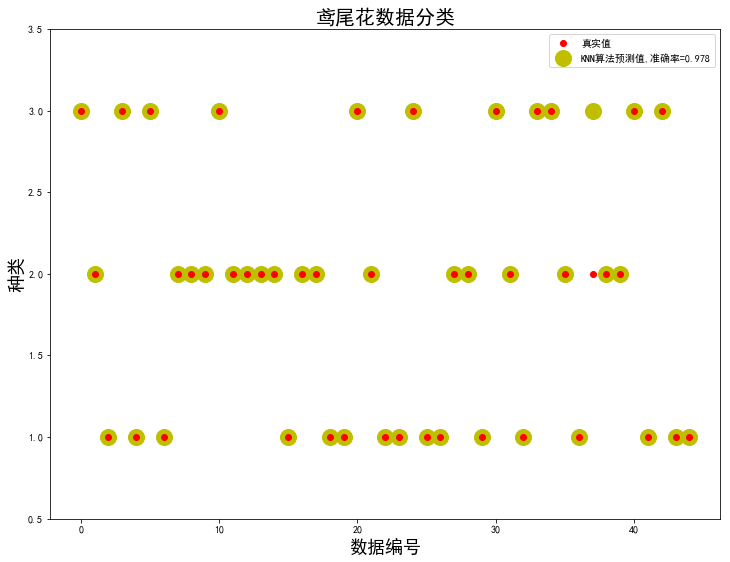

In [32]:
#预测结果画图
x_test_len=np.arange(len(X_test))
plt.figure(figsize=(12,9),facecolor='w')
plt.ylim(0.5,3.5)
plt.plot(x_test_len,Y_test,'ro',markersize = 6, zorder=3, label=u'真实值')
plt.plot(x_test_len, knn_y_predict, 'yo', markersize = 16, zorder=1, label=u'KNN算法预测值,准确率=%.3f' % knn.score(X_test, Y_test))
plt.legend(loc = 'upper right')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'种类', fontsize=18)
plt.title(u'鸢尾花数据分类', fontsize=20)
plt.show()
